# Solving the Multi-Armed Bandit Problem with Simple Reinforcement Learning


The purpose of this exercise was to get my feet wet with simple reinforcement learning algorithms.  My goal was to write as simple code as possible for both learning purposes and readability.  <br>

I solved the [multi-armed bandit problem](https://en.wikipedia.org/wiki/Multi-armed_bandit), a common machine learning problem.  I used a Bernoulli Bandit, which issues as reward of 1 with a probability of p and otherwise a reward of 0. 

Policies included:
-  Random 
-  Greedy 
-  Epsilon 
-  Epsilon Decay 
-  Thompson Sampling
-  Upper Confidence Bound (UCB)

The "Machine Learning" part of this can be considered the dictionary Q, where I hold the reward values of each arm.  For example in epsilon greedy, if we pull an arm and win the reward, we increment the Q value of the that arm by:<br>
Q[selection]+=((1/action_attempts[selection])*(1-Q[selection]))



### Random
The random approach is self explanatory.  We select a random arm from the bandit.  If we win with the random selection, I increment the score by 1.  

### Greedy
In the greedy approach, I choose the arm that has the highest reward.  Since all arms have zero rewards to begin with, it takes a random arm.  If this arm has the highest reward of all arms, then the greedy algorithm will do well.  However, most times it will lock onto an arm that is suboptimal and keep selecting this one.  It's reward will slowly increase, causing the algorithm to continue selecting this option.  This is not a great algorithm.  

### Epsilon
The epsilon algorithm selects a random value epsilon% of the time, and selects the value with the best reward (Q value) (1-epsilon) % of the time.  

### Epsilon Decay
Epsilon Decay lowers the epsilon value each iteration by a decay rate and follows the above logic.  This means that the further we get in the game, the more we should know about the rewards of each arm.  Therefore as epsilon decreases we will select the arm with the highest reward more and more.

### Thompson Sampling
Thompson Sampling uses the beta distribution.  We initalize alpha and beta to 1 because we are uncertain of each. If we are rewarded, we increment alpha by 1.  We add (1-reward) to beta.  [A smart guy on Quora](https://www.quora.com/What-is-Thompson-sampling-in-laymans-terms) explains Thompson Sampling well, and once I understood the beta distribution part of it, it was fairly easy to code.  

### UCB
I found a good explanation of the UCB algorithm in this link-https://stats.stackexchange.com/questions/323867/upper-confidence-bound-in-machine-learning<br>
N is the total number sampled and n is the total of a particular bandit sampled.  C is a constant. I am unsure if the equation was implemented perfectly, but the results seem to be consistently strong.  
![title](ucb.png)

25 armed bandit probabilities:
[0.25327771 0.28505689 0.09481094 0.46030042 0.87716265 0.70701305
 0.99811412 0.89372264 0.33559505 0.54104795 0.51872854 0.93547398
 0.50764622 0.48385779 0.69501096 0.19414172 0.00205451 0.40222631
 0.55529817 0.3050411  0.13567857 0.94373494 0.03093354 0.39656071
 0.73156265]

Random Action
{1: 0.3055555555555555, 2: 0.30000000000000004, 3: 0.023809523809523808, 4: 0.5555555555555556, 5: 0.8965517241379309, 6: 0.6590909090909092, 7: 1.0, 8: 0.8095238095238095, 9: 0.40816326530612235, 10: 0.5454545454545454, 11: 0.5833333333333334, 12: 0.9687499999999999, 13: 0.5333333333333335, 14: 0.6363636363636364, 15: 0.6078431372549019, 16: 0.23809523809523808, 17: 0.0, 18: 0.3859649122807017, 19: 0.4545454545454546, 20: 0.2777777777777778, 21: 0.03703703703703705, 22: 0.883720930232558, 23: 0.02127659574468085, 24: 0.44444444444444453, 25: 0.7368421052631577}
Score: 488

Greedy
{1: 0.2489999999999999, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0,

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:153: RuntimeWarning: invalid value encountered in sqrt


[0.25000000000000006, 0.16666666666666669, 0.16666666666666669, 0.5294117647058824, 0.8823529411764706, 0.6785714285714286, 1.0, 0.9416058394160584, 0.3333333333333333, 0.3333333333333333, 0.5294117647058825, 0.9627329192546585, 0.4615384615384615, 0.3636363636363636, 0.7435897435897437, 0.3333333333333333, 0.0, 0.5000000000000001, 0.5555555555555557, 0.3333333333333333, 0.16666666666666669, 0.9374999999999999, 0.0, 0.25000000000000006, 0.3333333333333333]
Score: 836


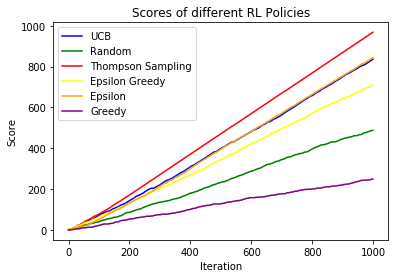

In [20]:
import numpy as np
import math
import operator
import random
from matplotlib import pyplot as plt

random.seed()


#number of pulls in game
maxsteps=1000


def greedy():
    best=max(Q.items(), key=operator.itemgetter(1))
    return best[0]

def random_selection():
    return random.randint(1, num_bandits)

def epsilonGreedy():
    if np.random.uniform() < epsilon:
        # Random Move
        return random_selection()
    else:
        # Greedy Move
        return greedy()
    

#n armed bandit
num_bandits=25
mab=np.random.rand(num_bandits)
print(str(num_bandits)+" armed bandit probabilities:")
print(mab)

#random 
print("\nRandom Action")
Q={i:0 for i in range(1,num_bandits+1)}
action_attempts={i:0 for i in range(1,num_bandits+1)}
score=0
rando=[]
for step in range(maxsteps):
    selection=random_selection()
    action_attempts[selection]+=1    
    reward=0
    if(random.uniform(0, 1)<mab[selection-1]):
        reward=1
        score+=1
    Q[selection]+=((1/action_attempts[selection])*(reward-Q[selection]))
    rando.append(score)
print(Q)
print("Score: "+str(score))



#greedy
print("\nGreedy")
Q={i:0 for i in range(1,num_bandits+1)}
action_attempts={i:0 for i in range(1,num_bandits+1)}
score=0
gre=[]
for step in range(maxsteps):

    selection=greedy()
    action_attempts[selection]+=1
    reward=0
    if(random.uniform(0, 1)<mab[selection-1]):
        score+=1
        reward=1

    Q[selection]+=((1/action_attempts[selection])*(reward-Q[selection]))
    gre.append(score)
print(Q)
print("Score: "+str(score))



#epsilon greedy no decay
print("\nEpsilon Greedy No Decay")
epsilon=.2
Q={i:0 for i in range(1,num_bandits+1)}
action_attempts={i:0 for i in range(1,num_bandits+1)}
score=0
learningRate=0.2
ep=[]
for step in range(maxsteps):
    selection=epsilonGreedy()
    action_attempts[selection]+=1
    #print(selection)
    reward=0
    if(random.uniform(0, 1)<mab[selection-1]):
        reward=1
        score+=1
    Q[selection]+=((1/action_attempts[selection])*(reward-Q[selection]))
    ep.append(score)
print(Q)
print("Score: "+str(score))




#epsilon greedy with decay
epsilon=1
decayRate=.9
print("\nEpsilon Greedy with Decay")
Q={i:0 for i in range(1,num_bandits+1)}
action_attempts={i:0 for i in range(1,num_bandits+1)}
score=0
ep_dec=[]
for step in range(maxsteps):
    epsilon*=decayRate
    selection=epsilonGreedy()
    action_attempts[selection]+=1
    reward=0
    if(random.uniform(0, 1)<mab[selection-1]):
        reward=1
        score+=1
    Q[selection]+=((1/action_attempts[selection])*(reward-Q[selection]))
    ep_dec.append(score)
print(Q)
print("Score: "+str(score))


#Thompson sampling
alpha=[1]*num_bandits
beta=[1]*num_bandits
print("\nThompson Sampling")
score=0
ts=[]
for step in range(maxsteps):
    sample=[np.random.beta(alpha[x],beta[x]) for x in range(num_bandits)]
    selection=sample.index(max(sample))
    reward=0
    if(random.uniform(0, 1)<mab[selection-1]):
        reward=1
        score+=1
    alpha[selection]+=reward
    beta[selection]+=(1-reward)
    ts.append(score)
print("Score: "+str(score))




#UCB
print("\nUCB")
ucb=[]
probs=[1]*num_bandits
action_attempts={i:0 for i in range(1,num_bandits+1)}
score=0
np.seterr(divide = 'ignore') 
for step in range(maxsteps):
    sample=[probs[x]+np.sqrt(np.log(step)/(1+action_attempts[x+1])) for x in range(num_bandits)]
    selection=sample.index(max(sample))
    action_attempts[selection+1]+=1
    reward=0
    if(random.uniform(0, 1)<mab[selection]):
        reward=1
        score+=1
    probs[selection]+=((1/action_attempts[selection+1])*(reward-probs[selection]))
    ucb.append(score)
print(probs)
print("Score: "+str(score))




X = np.arange(maxsteps)
figure = plt.figure()
tick_plot = figure.add_subplot(1, 1, 1)
tick_plot.plot(X, ucb,  color='blue', linestyle='-',label='UCB')
tick_plot.plot(X, rando,  color='green', linestyle='-',label='Random')
tick_plot.plot(X, ts,  color='red', linestyle='-',label='Thompson Sampling')
tick_plot.plot(X, ep_dec,  color='yellow', linestyle='-',label='Epsilon Greedy')
tick_plot.plot(X, ep,  color='orange', linestyle='-',label='Epsilon')
tick_plot.plot(X, gre,  color='purple', linestyle='-',label='Greedy')
plt.title("Scores of different RL Policies")
plt.legend(loc='upper left')
plt.xlabel('Iteration')
plt.ylabel('Score')
plt.show()
